<a href="https://colab.research.google.com/github/fressbish/Koptev-Dmitry/blob/main/task4_Koptev_Dmitry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Дмитрий Коптев
Задание 4: https://github.com/rustam-azimov/graph-course-itmo/blob/main/tasks/task4.md


## **Функция PageRank**

Везде считаем, что вершины графа занумерованы подряд с нуля.

 Используя python-graphblas реализовать функцию PageRank с параметрами из лекции.

In [1]:
# pip install python-graphblas[default]

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import graphblas as gb
from graphblas import Matrix, Vector
from graphblas import dtypes
from graphblas import unary, binary, monoid, semiring

In [3]:
def pagerank(A, damping = 0.85, itermax = 100, tol = 1e-4):

    A << A.apply(unary.one)
    N = A.nrows

    t = Vector(dtypes.FP32, N)
    r = Vector(dtypes.FP32, N)
    r[:] << 1.0 / N
    diff = 1 # first iteration is always done

    # Compute outbound degree of nodes
    d_out = A.reduce_rowwise(monoid.plus).new(dtype="FP32")
    d_out(accum=binary.truediv)[:] << damping

    # pagerank iterations
    for i in range(itermax):
        if diff <= tol:
            break
        t = r
        r = A.T.mxv(t.ewise_mult(d_out, binary.truediv), semiring.plus_second) + (1 - damping) / N
        diff = abs(r - t).reduce(monoid.plus)

    return r, i

Проверим работу функции на примере

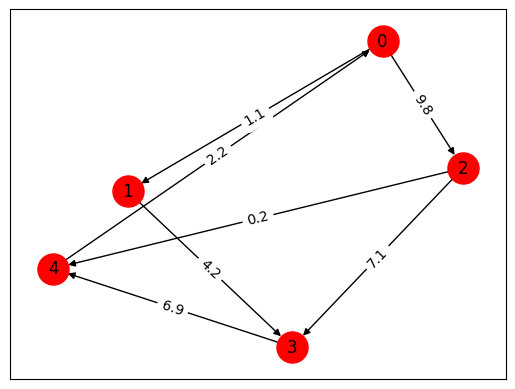

In [4]:
A = Matrix.from_coo(
    [0, 0, 1, 2, 2, 3, 4],
    [1, 2, 3, 3, 4, 4, 0],
    [1.1, 9.8, 4.2, 7.1, 0.2, 6.9, 2.2],
)

gb.viz.draw(A)

In [5]:
result, iters = pagerank(A)
result

gb.VectorExpression                                         size  dtype
v_184.apply(binary.plus[FP64], right=0.030000000000000006)     5   FP64

"Result"   nvals  size  dtype
gb.Vector      5     5   FP64
-----------------------------
index         0         1         2         3         4
value  0.254213  0.138031  0.138031  0.205973  0.263752

Do expr.new() or other << expr to calculate the expression.

In [6]:
iters

37